# Import libraries

In [6]:
# For data processing
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('fivethirtyeight') 

# For data splitting
from sklearn.model_selection import train_test_split

# For handling imbalanced dataset
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [13]:
df = pd.read_csv("cleaned-movie-dataset.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Label
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


# Data splitting

## Check for class imbalance
Since the target variable is binary (spam or not spam), it's important to check if the dataset is balanced or imbalanced. We will plot a bar chart to visualize the distribution of spam and non-spam emails in the dataset.

In [8]:
# count the number of spam and non-spam emails
spam_count = df['Label'].sum()
nonspam_count = len(df) - spam_count

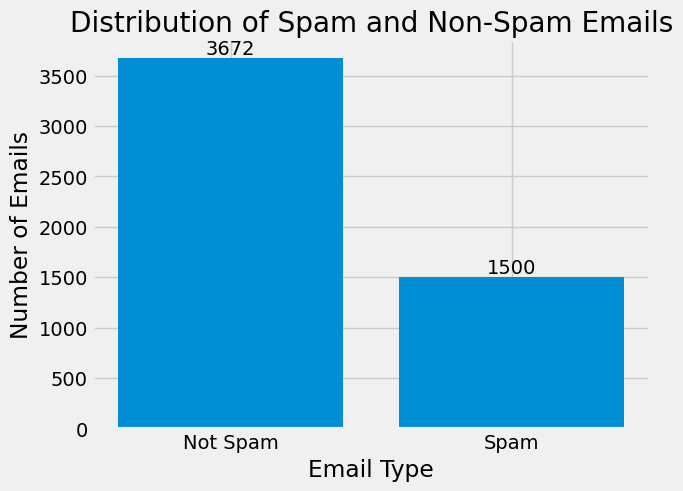

In [9]:
# plot the bar chart
plt.bar(['Not Spam', 'Spam'], [nonspam_count, spam_count])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Distribution of Spam and Non-Spam Emails')

# annotate the bars with their respective counts
plt.annotate(nonspam_count, xy=(0, nonspam_count), ha='center', va='bottom')
plt.annotate(spam_count, xy=(1, spam_count), ha='center', va='bottom')

plt.show()

In this dataset, there is 3672 non-spam emaild and 1500 spam emails. This indicates that the dataset is imbalanced because the number of non-spam emails is significantly higher than the number of spam emails. Therefore, the model may have better performance on non-spam emails but may not perform well on spam emails.

To address class imbalance, there are various techniques we suppose to use such as oversampling the minority class, undersampling the majority class, or using a combination of both.